# COMP809 – Data Mining & Machine Learning - Semester 1, 2025 - Assignment 2

# Student ID: 24251155

# Flood Warning Prediction

## 1. Introduction and Data Preprocessing

In [1]:
import pandas as pd

In [2]:
# Load the dataset
file_path = r"C:\AUT_Lecture\COMP809_Datamining_and_Machine_Learning\Assignment_2_COMP809\Manukau.csv"
df = pd.read_csv(file_path)

# Display basic information and first few rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43804 entries, 0 to 43803
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   #Bulk Export - Points every 1 hour(s)  43801 non-null  object
 1   Unnamed: 1                             43801 non-null  object
 2   Unnamed: 2                             43742 non-null  object
 3   Unnamed: 3                             43743 non-null  object
 4   Unnamed: 4                             43804 non-null  object
 5   Unnamed: 5                             43804 non-null  object
 6   Unnamed: 6                             41383 non-null  object
 7   Unnamed: 7                             43804 non-null  object
 8   Unnamed: 8                             43804 non-null  object
 9   Unnamed: 9                             41383 non-null  object
dtypes: object(10)
memory usage: 3.3+ MB


In [1]:
#kara's code - can delete later!
import pandas as pd
# Load the dataset
file_path = r"/Users/karalainiverebasaga/Downloads/Manukau.csv"
df= pd.read_csv(r"Manukau.csv"); 

# Display basic information and first few rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43804 entries, 0 to 43803
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   #Bulk Export - Points every 1 hour(s)  43801 non-null  object
 1   Unnamed: 1                             43801 non-null  object
 2   Unnamed: 2                             43742 non-null  object
 3   Unnamed: 3                             43743 non-null  object
 4   Unnamed: 4                             43804 non-null  object
 5   Unnamed: 5                             43804 non-null  object
 6   Unnamed: 6                             41383 non-null  object
 7   Unnamed: 7                             43804 non-null  object
 8   Unnamed: 8                             43804 non-null  object
 9   Unnamed: 9                             41383 non-null  object
dtypes: object(10)
memory usage: 3.3+ MB


In [3]:
df.head()

,#Bulk Export - Points every 1 hour(s),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,43807,43807,649940,740945,370,370,370,370
1,NaN,NaN,Puhinui @ Drop Structure,Puhinui @ Drop Structure,Manukau @ Sports Bowl,Puhinui at Botanical Gardens,Papatoetoe,Papatoetoe,Papatoetoe,Papatoetoe
2,NaN,NaN,River Water Level.Continuous,River Discharge.Continuous,Rainfall.Continuous,Rainfall.Continuous,Rel Humidity.Hourly Aggregate (%) - Unverified,Air Temp.Hourly Aggregate (°C) - Unverified,Wind Speed m/s.Hourly Aggregate (m/s) - Unveri...,Wind Dir.Hourly Aggregate (°) - Unverified
3,Start of Interval (UTC+12:00),End of Interval (UTC+12:00),Average (m),Average (m^3/s),Total (mm),Total (mm),Average (%),Average (°C),Average (m/s),Average (°)
4,2020-05-01 00:00:00,2020-05-01 01:00:00,0.096,0.019,0,0,79.55000000000001,11.5,0.225,171.5


In [5]:
# Load the data, skip 4 metadata rows
df_clean = pd.read_csv(file_path, skiprows=4)

# Rename columns for convenience
df_clean.columns = [
    "start_time", "end_time", "river_level_m", "river_discharge_m3s",
    "rainfall_manukau_mm", "rainfall_puhinui_mm", "humidity_pct",
    "air_temp_C", "wind_speed_ms", "wind_dir_deg"
]

# Convert start_time and end_time to datetime
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'], dayfirst=False, errors='coerce')
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'], dayfirst=False, errors='coerce')

# Convert numeric columns
for col in df_clean.columns[2:]:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Check if there's any missing start and end time
print("Missing start_time:", df_clean['start_time'].isna().sum())
print("Missing end_time:", df_clean['end_time'].isna().sum())

Missing start_time: 0
Missing end_time: 0


In [7]:
# Check for duplicate timestamps
duplicate_start_times = df_clean['start_time'].duplicated().sum()
duplicate_end_times = df_clean['end_time'].duplicated().sum()

print("Duplicate start_time entries:", duplicate_start_times)
print("Duplicate end_time entries:", duplicate_end_times)

Duplicate start_time entries: 0
Duplicate end_time entries: 0


In [9]:
# Re-checking the summary of the DataFrame 
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   start_time           43800 non-null  datetime64[ns]
 1   end_time             43800 non-null  datetime64[ns]
 2   river_level_m        43738 non-null  float64       
 3   river_discharge_m3s  43739 non-null  float64       
 4   rainfall_manukau_mm  43800 non-null  float64       
 5   rainfall_puhinui_mm  43800 non-null  float64       
 6   humidity_pct         41379 non-null  float64       
 7   air_temp_C           43800 non-null  float64       
 8   wind_speed_ms        43800 non-null  float64       
 9   wind_dir_deg         41379 non-null  float64       
dtypes: datetime64[ns](2), float64(8)
memory usage: 3.3 MB


In [11]:
# Re-checking the first few rows of the dataframe
df_clean.head()

,start_time,end_time,river_level_m,river_discharge_m3s,rainfall_manukau_mm,rainfall_puhinui_mm,humidity_pct,air_temp_C,wind_speed_ms,wind_dir_deg
0,2020-05-01 00:00:00,2020-05-01 01:00:00,0.096000,0.019,0.0,0.0,79.55,11.5,0.225000,171.5
1,2020-05-01 01:00:00,2020-05-01 02:00:00,0.096000,0.019,0.0,0.0,78.45,12.0,0.275000,133.5
2,2020-05-01 02:00:00,2020-05-01 03:00:00,0.095625,0.019,0.0,0.0,80.25,11.5,0.233333,110.5
3,2020-05-01 03:00:00,2020-05-01 04:00:00,0.095000,0.019,0.0,0.0,82.70,10.5,0.216667,102.5
4,2020-05-01 04:00:00,2020-05-01 05:00:00,0.095000,0.019,0.0,0.0,83.30,10.0,0.191667,139.0


In [13]:
# Checking missing values
df_clean.isna().sum()

start_time                0
end_time                  0
river_level_m            62
river_discharge_m3s      61
rainfall_manukau_mm       0
rainfall_puhinui_mm       0
humidity_pct           2421
air_temp_C                0
wind_speed_ms             0
wind_dir_deg           2421
dtype: int64

In [15]:
# Reset index since 'start_time' is already used as index
if df_clean.index.name == 'start_time':
    df_clean = df_clean.reset_index()

# Convert start_time to datetime again
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'], errors='coerce')

# Set start_time as index
df_clean = df_clean.set_index('start_time')

# Interpolate numeric columns only
numeric_cols = df_clean.select_dtypes(include='number').columns
df_clean[numeric_cols] = df_clean[numeric_cols].interpolate(method='time', limit_direction='both')

# Restore the time index as a column
df_clean = df_clean.reset_index()

In [17]:
# Checking missing values after cleaning with median imputation
df_clean.isna().sum()

start_time             0
end_time               0
river_level_m          0
river_discharge_m3s    0
rainfall_manukau_mm    0
rainfall_puhinui_mm    0
humidity_pct           0
air_temp_C             0
wind_speed_ms          0
wind_dir_deg           0
dtype: int64

In [19]:
# Ensure numeric conversion of all relevant columns
cols_to_check = [
    "river_level_m", "river_discharge_m3s", "rainfall_manukau_mm",
    "rainfall_puhinui_mm", "humidity_pct", "air_temp_C",
    "wind_speed_ms", "wind_dir_deg"
]

for col in cols_to_check:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    
# Define outlier conditions
outlier_conditions = {
    "air_temp_C_above_40": df_clean["air_temp_C"] > 40,
    "humidity_pct_above_100": df_clean["humidity_pct"] > 100,
    "humidity_pct_below_0": df_clean["humidity_pct"] < 0,
    "river_level_m_below_0": df_clean["river_level_m"] < 0,
    "river_discharge_m3s_below_0": df_clean["river_discharge_m3s"] < 0,
    "rainfall_negative": (df_clean["rainfall_manukau_mm"] < 0) | (df_clean["rainfall_puhinui_mm"] < 0),
    "wind_speed_ms_below_0": df_clean["wind_speed_ms"] < 0,
    "wind_dir_deg_out_of_range": (df_clean["wind_dir_deg"] < 0) | (df_clean["wind_dir_deg"] > 360),
}

# Check outliers for each condition
outlier_counts = {name: condition.sum() for name, condition in outlier_conditions.items()}
outlier_counts

{'air_temp_C_above_40': 0,
 'humidity_pct_above_100': 0,
 'humidity_pct_below_0': 0,
 'river_level_m_below_0': 0,
 'river_discharge_m3s_below_0': 0,
 'rainfall_negative': 0,
 'wind_speed_ms_below_0': 0,
 'wind_dir_deg_out_of_range': 0}

In [21]:
# Checking the summary of the DataFrame again after data preprocessing
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   start_time           43800 non-null  datetime64[ns]
 1   end_time             43800 non-null  datetime64[ns]
 2   river_level_m        43800 non-null  float64       
 3   river_discharge_m3s  43800 non-null  float64       
 4   rainfall_manukau_mm  43800 non-null  float64       
 5   rainfall_puhinui_mm  43800 non-null  float64       
 6   humidity_pct         43800 non-null  float64       
 7   air_temp_C           43800 non-null  float64       
 8   wind_speed_ms        43800 non-null  float64       
 9   wind_dir_deg         43800 non-null  float64       
dtypes: datetime64[ns](2), float64(8)
memory usage: 3.3 MB


In [23]:
# Checking descriptive statistics of the columns in the DataFrame
df_clean.describe()

,start_time,end_time,river_level_m,river_discharge_m3s,rainfall_manukau_mm,rainfall_puhinui_mm,humidity_pct,air_temp_C,wind_speed_ms,wind_dir_deg
count,43800,43800,43800.000000,43800.000000,43800.000000,43800.000000,43800.00000,43800.000000,43800.000000,43800.000000
mean,2022-10-30 11:30:00,2022-10-30 12:30:00,0.212470,0.242644,0.145587,0.153939,75.08300,16.171187,1.429073,172.386507
min,2020-05-01 00:00:00,2020-05-01 01:00:00,0.063683,0.004833,0.000000,0.000000,28.00000,1.000000,0.025000,4.500000
25%,2021-07-31 05:45:00,2021-07-31 06:45:00,0.138000,0.051029,0.000000,0.000000,65.02341,13.500000,0.600000,112.000000
50%,2022-10-30 11:30:00,2022-10-30 12:30:00,0.178517,0.097575,0.000000,0.000000,76.40000,16.000000,1.133827,185.500000
75%,2024-01-29 17:15:00,2024-01-29 18:15:00,0.237558,0.191767,0.000000,0.000000,85.95000,19.000000,2.025000,220.500000
max,2025-04-29 23:00:00,2025-04-30 00:00:00,20.247300,63.686517,50.311182,43.120000,100.00000,29.000000,8.008333,355.500000
std,NaN,NaN,0.163404,0.805458,0.872663,0.867889,13.48558,4.109998,1.073642,82.498285


In [25]:
# Flood classification using 99th percentile of river level
flood_threshold = df_clean["river_level_m"].quantile(0.99)
df_clean["flood"] = (df_clean["river_level_m"] >= flood_threshold).astype(int)

# Return threshold and class counts
flood_threshold, df_clean["flood"].value_counts()

(0.6991088333333352,
 flood
 0    43362
 1      438
 Name: count, dtype: int64)

## 2. Data Exploration and Feature Selection

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   start_time           43800 non-null  datetime64[ns]
 1   end_time             43800 non-null  datetime64[ns]
 2   river_level_m        43800 non-null  float64       
 3   river_discharge_m3s  43800 non-null  float64       
 4   rainfall_manukau_mm  43800 non-null  float64       
 5   rainfall_puhinui_mm  43800 non-null  float64       
 6   humidity_pct         43800 non-null  float64       
 7   air_temp_C           43800 non-null  float64       
 8   wind_speed_ms        43800 non-null  float64       
 9   wind_dir_deg         43800 non-null  float64       
 10  flood                43800 non-null  int64         
dtypes: datetime64[ns](2), float64(8), int64(1)
memory usage: 3.7 MB


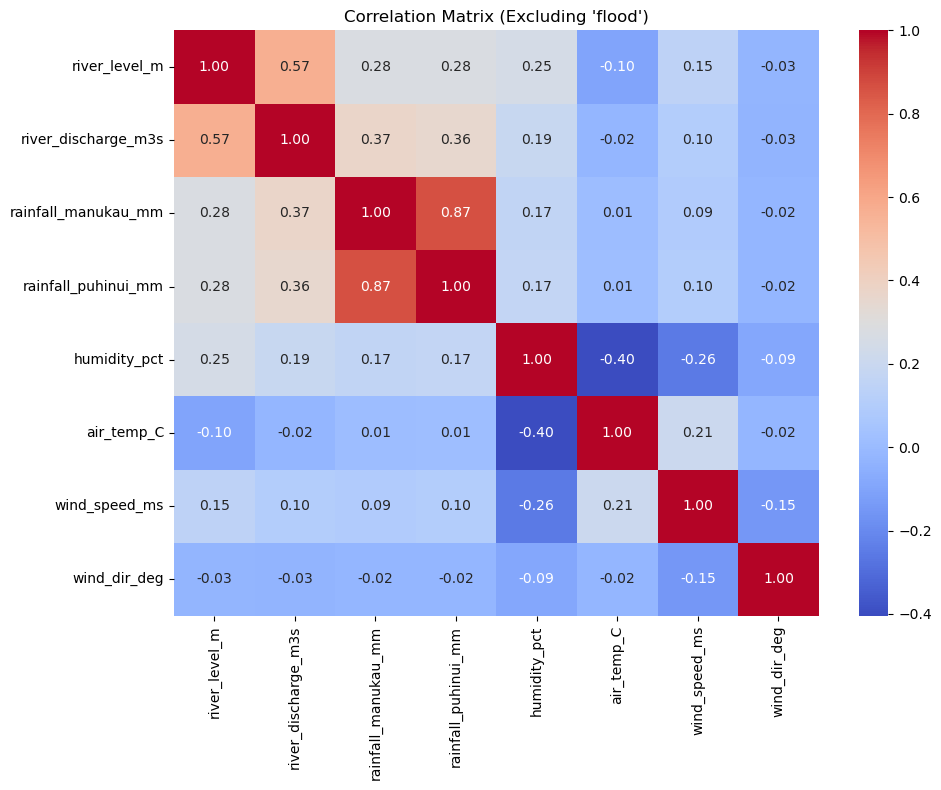

In [30]:
# Drop 'flood' from the DataFrame before computing correlation 
# since it's a binary derived variable from river_level_m (based on the 99th percentile threshold),
# and its correlation with the target is artificially high and not meaningful for predictor selection.
corr_df = df_clean.drop(columns=['flood'], errors='ignore')

# Compute correlation matrix (only for numeric columns)
correlation_matrix = corr_df.corr(numeric_only=True)

# Get top 4 predictors of river_level_m (excluding itself)
top4_predictors = correlation_matrix["river_level_m"].drop("river_level_m").abs().sort_values(ascending=False).head(4)

# Prepare summary statistics for top 4 predictors
summary_stats = df_clean[top4_predictors.index].describe()

# Plot correlation matrix without 'flood'
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix (Excluding 'flood')")
plt.tight_layout()
plt.show()

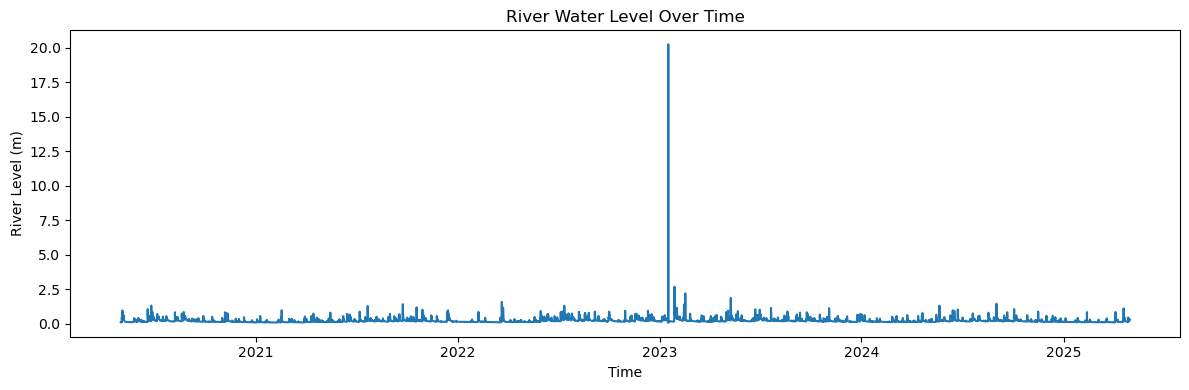

In [31]:
# Line plot of river level
plt.figure(figsize=(12, 4))
plt.plot(df_clean['start_time'], df_clean['river_level_m'], label="River Level (m)")
plt.title("River Water Level Over Time")
plt.xlabel("Time")
plt.ylabel("River Level (m)")
plt.tight_layout()
plt.show()

In [32]:
# To display top predictors
print("Top 4 Predictors:", top4_predictors)

Top 4 Predictors: river_discharge_m3s    0.566579
rainfall_puhinui_mm    0.279551
rainfall_manukau_mm    0.279542
humidity_pct           0.250188
Name: river_level_m, dtype: float64


In [33]:
# To display class distribution
flood_counts = df_clean["flood"].value_counts()
print("\nFlood Class Distribution:")
print(flood_counts)


Flood Class Distribution:
flood
0    43362
1      438
Name: count, dtype: int64


In [40]:
from IPython.display import display

# To display the summary statistics DataFrame
display(summary_stats)

,river_discharge_m3s,rainfall_puhinui_mm,rainfall_manukau_mm,humidity_pct
count,43800.000000,43800.000000,43800.000000,43800.00000
mean,0.242644,0.153939,0.145587,75.08300
std,0.805458,0.867889,0.872663,13.48558
min,0.004833,0.000000,0.000000,28.00000
25%,0.051029,0.000000,0.000000,65.02341
50%,0.097575,0.000000,0.000000,76.40000
75%,0.191767,0.000000,0.000000,85.95000
max,63.686517,43.120000,50.311182,100.00000


## 4. Multilayer Perceptron (MLP)

Data windows shapes: X=(43774, 96), y=(43774, 3)
=== PART 1: Single Hidden Layer MLPRegressor (Baseline) ===
LR=0.0001 → MSE: 0.0174, R²: 0.5602, Accuracy: 0.9998
LR=0.0010 → MSE: 0.0168, R²: 0.5870, Accuracy: 0.9998
LR=0.0100 → MSE: 0.0168, R²: 0.5896, Accuracy: 0.9998
LR=0.0500 → MSE: 0.0185, R²: 0.5223, Accuracy: 0.9997

--- Best Model (Single Layer) ---
Best learning rate: 0.01, R²: 0.5896
Confusion Matrix:
[[39392     1]
 [    5     1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39393
           1       0.50      0.17      0.25         6

    accuracy                           1.00     39399
   macro avg       0.75      0.58      0.62     39399
weighted avg       1.00      1.00      1.00     39399



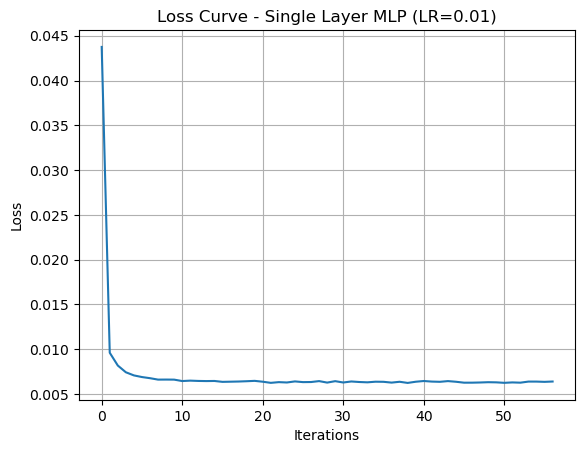

Sample predictions (first 5 samples):
[[0.12240079 0.12298549 0.12159646]
 [0.18180681 0.18249852 0.18225044]
 [0.20908321 0.21671974 0.21258261]
 [0.12779748 0.12682625 0.12581588]
 [0.13679786 0.1363825  0.13442902]]


In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

# === STEP 0: Define sliding window function ===
def create_sliding_windows(X, y, lookback=24, horizon=3):
    X_windows = []
    y_windows = []
    total_samples = X.shape[0]

    for start_idx in range(total_samples - lookback - horizon + 1):
        end_idx = start_idx + lookback
        horizon_end_idx = end_idx + horizon

        X_window = X[start_idx:end_idx].flatten()
        y_window = y[end_idx:horizon_end_idx]

        X_windows.append(X_window)
        y_windows.append(y_window)

    return np.array(X_windows), np.array(y_windows)

# === STEP 1: Load and prepare data ===
feature_cols = ['river_discharge_m3s', 'rainfall_puhinui_mm', 'rainfall_manukau_mm', 'humidity_pct']
target_col = 'river_level_m'

# Extract features and target from df_clean (make sure df_clean is loaded)
X_raw = df_clean[feature_cols].values
y_raw = df_clean[target_col].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

# Create sliding windows
lookback = 24  # past 24 hours
horizon = 3    # next 3 hours prediction

X_windows, y_windows = create_sliding_windows(X_scaled, y_raw, lookback, horizon)

print(f"Data windows shapes: X={X_windows.shape}, y={y_windows.shape}")

# Train/test split 70/30
x_train_mlp, x_test_mlp, y_train_mlp, y_test_mlp = train_test_split(
    X_windows, y_windows, test_size=0.3, random_state=42
)

flood_threshold = 2.5  # set appropriate flood level threshold for classification

# === PART 1: Single Hidden Layer MLP ===
print("=== PART 1: Single Hidden Layer MLPRegressor (Baseline) ===")

k = 25  # number of neurons
learning_rates = [0.0001, 0.001, 0.01, 0.05]
best_r2 = -np.inf

for lr in learning_rates:
    mlp = MLPRegressor(hidden_layer_sizes=(k,), learning_rate_init=lr,
                       max_iter=1000, early_stopping=True, random_state=42)

    mlp.fit(x_train_mlp, y_train_mlp)

    y_pred_mlp = mlp.predict(x_test_mlp)  # shape (num_samples, 3)

    mse = mean_squared_error(y_test_mlp, y_pred_mlp)
    r2 = r2_score(y_test_mlp, y_pred_mlp)

    y_pred_class_mlp = (y_pred_mlp > flood_threshold).astype(int)
    y_test_class_mlp = (y_test_mlp > flood_threshold).astype(int)

    acc = accuracy_score(y_test_class_mlp.flatten(), y_pred_class_mlp.flatten())

    print(f"LR={lr:.4f} → MSE: {mse:.4f}, R²: {r2:.4f}, Accuracy: {acc:.4f}")

    if r2 > best_r2:
        best_r2 = r2
        best_lr = lr
        best_model_mlp = mlp
        best_pred_mlp = y_pred_mlp
        best_pred_class_mlp = y_pred_class_mlp
        best_y_test_class_mlp = y_test_class_mlp

print("\n--- Best Model (Single Layer) ---")
print(f"Best learning rate: {best_lr}, R²: {best_r2:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(best_y_test_class_mlp.flatten(), best_pred_class_mlp.flatten()))
print("Classification Report:")
print(classification_report(best_y_test_class_mlp.flatten(), best_pred_class_mlp.flatten()))

plt.plot(best_model_mlp.loss_curve_)
plt.title(f"Loss Curve - Single Layer MLP (LR={best_lr})")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

print("Sample predictions (first 5 samples):")
print(best_pred_mlp[:5])  # each row has 3 predicted river levels


=== PART 2: Two Hidden Layers – Neuron Split Experiment with Sliding Window ===
Using best LR from Part 1: 0.01
Training MLP with hidden layers: (24, 1)
Training MLP with hidden layers: (23, 2)
Training MLP with hidden layers: (22, 3)
Training MLP with hidden layers: (21, 4)
Training MLP with hidden layers: (20, 5)
Training MLP with hidden layers: (19, 6)
Training MLP with hidden layers: (18, 7)
Training MLP with hidden layers: (17, 8)
Training MLP with hidden layers: (16, 9)
Training MLP with hidden layers: (15, 10)
Training MLP with hidden layers: (14, 11)
Training MLP with hidden layers: (13, 12)
Training MLP with hidden layers: (12, 13)
Training MLP with hidden layers: (11, 14)
Training MLP with hidden layers: (10, 15)
Training MLP with hidden layers: (9, 16)
Training MLP with hidden layers: (8, 17)
Training MLP with hidden layers: (7, 18)
Training MLP with hidden layers: (6, 19)
Training MLP with hidden layers: (5, 20)
Training MLP with hidden layers: (4, 21)
Training MLP with hi

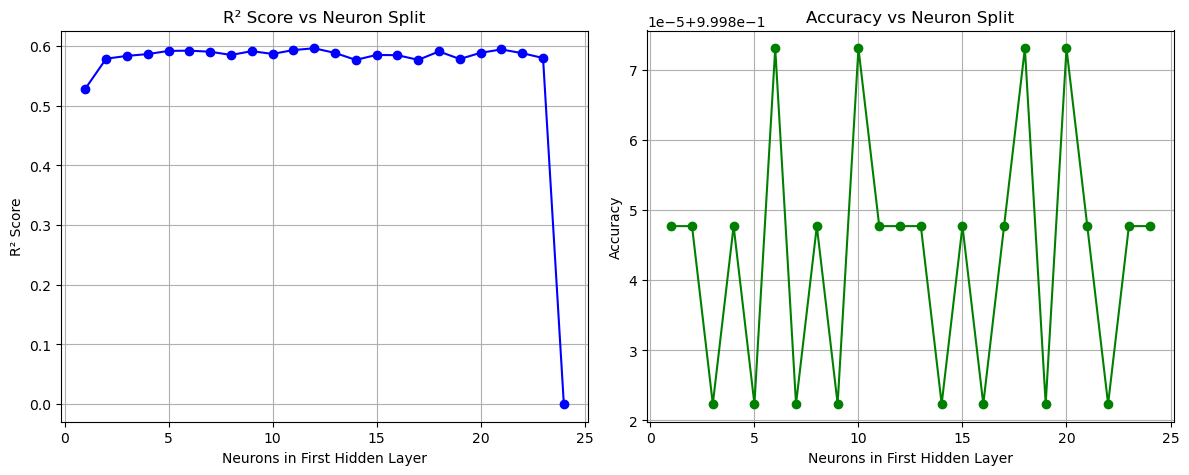

In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score, accuracy_score

print("\n=== PART 2: Two Hidden Layers – Neuron Split Experiment with Sliding Window ===")

best_r2_two_layer = -np.inf
best_acc_two_layer = -np.inf
results = []

# Use the best learning rate found in Part 1
print(f"Using best LR from Part 1: {best_lr}")

for i in range(1, k):
    hidden_layers = (k - i, i)
    print(f"Training MLP with hidden layers: {hidden_layers}")

    mlp = MLPRegressor(hidden_layer_sizes=hidden_layers,
                       learning_rate_init=best_lr,
                       max_iter=1000,
                       early_stopping=True,
                       random_state=42)

    mlp.fit(x_train_mlp, y_train_mlp)

    y_pred = mlp.predict(x_test_mlp)  # shape (num_samples, 3)

    # Calculate regression metrics
    mse = mean_squared_error(y_test_mlp, y_pred)
    r2 = r2_score(y_test_mlp, y_pred)

    # Classification conversion based on flood threshold
    y_pred_class = (y_pred > flood_threshold).astype(int)
    y_test_class = (y_test_mlp > flood_threshold).astype(int)

    # Flatten for accuracy & confusion matrix
    acc = accuracy_score(y_test_class.flatten(), y_pred_class.flatten())

    results.append((hidden_layers, mse, r2, acc))

    if r2 > best_r2_two_layer:
        best_r2_two_layer = r2
        best_split_r2 = hidden_layers
        best_model_r2 = mlp
        best_pred_r2 = y_pred
        best_pred_class_r2 = y_pred_class
        best_y_test_class_r2 = y_test_class

    if acc > best_acc_two_layer:
        best_acc_two_layer = acc
        best_split_acc = hidden_layers
        best_model_acc = mlp
        best_pred_acc = y_pred
        best_pred_class_acc = y_pred_class
        best_y_test_class_acc = y_test_class

# Sort and display top 5 splits by R²
results_sorted = sorted(results, key=lambda x: x[2], reverse=True)
print("\nTop 5 Neuron Splits by R² Score:")
for hl, mse, r2, acc in results_sorted[:5]:
    print(f"Layers {hl} → MSE: {mse:.4f}, R²: {r2:.4f}, Accuracy: {acc:.4f}")

# Final report for best R² split
print(f"\nBest split by R²: {best_split_r2} → R²: {best_r2_two_layer:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(best_y_test_class_r2.flatten(), best_pred_class_r2.flatten()))
print("Classification Report:")
print(classification_report(best_y_test_class_r2.flatten(), best_pred_class_r2.flatten()))

# Sample predictions from best R² model (first 5 samples)
print("\nSample 3-hour predictions from best R² model (first 5 samples):")
print(best_pred_r2[:5])  # each row has 3 predicted river levels

# Plot R² and Accuracy vs neurons in first hidden layer
neurons_first_layer = [hl[0] for hl, _, _, _ in results]
r2_scores = [r2 for _, _, r2, _ in results]
accuracies = [acc for _, _, _, acc in results]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(neurons_first_layer, r2_scores, marker='o', color='b')
plt.xlabel('Neurons in First Hidden Layer')
plt.ylabel('R² Score')
plt.title('R² Score vs Neuron Split')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(neurons_first_layer, accuracies, marker='o', color='g')
plt.xlabel('Neurons in First Hidden Layer')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Neuron Split')
plt.grid(True)

plt.tight_layout()
plt.show()

## 5. Long Short-Term Memory (LSTM)

**Lookback & Forcast Horizon for LSTM Preparation**
- Set parameters: time step = 24, horizon = 3
- Build sequences (X, y) from df_clean["river_level_m"]
- Split into training (70%), validation (10%), and test (20%)

In [25]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Step 1: Select features and target
features = ['river_discharge_m3s', 'rainfall_manukau_mm', 'rainfall_puhinui_mm',
            'humidity_pct']
target = 'river_level_m'  # Predicting river level (regression)

# Step 2: Normalize features and target separately
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

X_scaled = feature_scaler.fit_transform(df_clean[features])
y_scaled = target_scaler.fit_transform(df_clean[[target]])

# Step 3: Create sequences with lookback of 24 hours and predict next 3 hours
lookback = 24
horizon = 3
X_seq, y_seq = [], []

for i in range(lookback, len(df_clean) - horizon + 1):
    X_seq.append(X_scaled[i - lookback:i])
    y_seq.append(y_scaled[i:i + horizon].flatten())

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# Step 4: Split into training (70%), validation (10%), test (20%)
total = len(X_seq)
train_end = int(0.7 * total)
val_end = int(0.8 * total)

X_train, y_train = X_seq[:train_end], y_seq[:train_end]
X_val, y_val = X_seq[train_end:val_end], y_seq[train_end:val_end]
X_test, y_test = X_seq[val_end:], y_seq[val_end:]

print("X_train shape:", X_train.shape)  # Expected: (num_samples, lookback, num_features)
print("y_train shape:", y_train.shape)  # Expected: (num_samples, horizon)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

import pandas as pd
sample_input = pd.DataFrame(X_train[0], columns=features)
print("Sample input sequence (X_train[0]) — shape:", sample_input.shape)
print(sample_input.head(5))  # Print first 5 timesteps: A Sample of the First Input Sequence

print("Sample target output (y_train[0]):", y_train[0]) # A Sample of the Corresponding Output

X_train shape: (30641, 24, 4)
y_train shape: (30641, 3)
X_val shape: (4378, 24, 4)
y_val shape: (4378, 3)
X_test shape: (8755, 24, 4)
y_test shape: (8755, 3)
Sample input sequence (X_train[0]) — shape: (24, 4)
   river_discharge_m3s  rainfall_manukau_mm  rainfall_puhinui_mm  humidity_pct
0             0.000222                  0.0                  0.0      0.715972
1             0.000222                  0.0                  0.0      0.700694
2             0.000222                  0.0                  0.0      0.725694
3             0.000222                  0.0                  0.0      0.759722
4             0.000222                  0.0                  0.0      0.768056
Sample target output (y_train[0]): [0.00140295 0.00140295 0.0013947 ]


In [26]:
!pip install tensorflow

**Step 1: Code for LSTM Epoch Optimization (Run locally)**

Epoch 1/30
7661/7661 ━━━━━━━━━━━━━━━━━━━━ 158s 20ms/step - loss: 2.1052e-04 - val_loss: 2.3111e-05
Epoch 2/30
7661/7661 ━━━━━━━━━━━━━━━━━━━━ 174s 23ms/step - loss: 1.5373e-04 - val_loss: 1.4551e-04
Epoch 3/30
7661/7661 ━━━━━━━━━━━━━━━━━━━━ 174s 23ms/step - loss: 7.1397e-05 - val_loss: 3.8227e-05
Epoch 4/30
7661/7661 ━━━━━━━━━━━━━━━━━━━━ 180s 24ms/step - loss: 1.0570e-04 - val_loss: 4.9164e-05
Epoch 5/30
7661/7661 ━━━━━━━━━━━━━━━━━━━━ 175s 23ms/step - loss: 9.6506e-05 - val_loss: 2.3704e-05
Epoch 6/30
7661/7661 ━━━━━━━━━━━━━━━━━━━━ 181s 24ms/step - loss: 1.1505e-04 - val_loss: 2.4977e-05
Epoch 7/30
7661/7661 ━━━━━━━━━━━━━━━━━━━━ 177s 23ms/step - loss: 7.9265e-05 - val_loss: 2.3066e-05
Epoch 8/30
7661/7661 ━━━━━━━━━━━━━━━━━━━━ 178s 23ms/step - loss: 1.0551e-04 - val_loss: 2.1655e-05
Epoch 9/30
7661/7661 ━━━━━━━━━━━━━━━━━━━━ 176s 23ms/step - loss: 8.7726e-05 - val_loss: 2.6884e-05
Epoch 10/30
7661/7661 ━━━━━━━━━━━━━━━━━━━━ 181s 24ms/step - loss: 5.9419e-05 - val_loss: 2.4474e-05
Epoch 11/

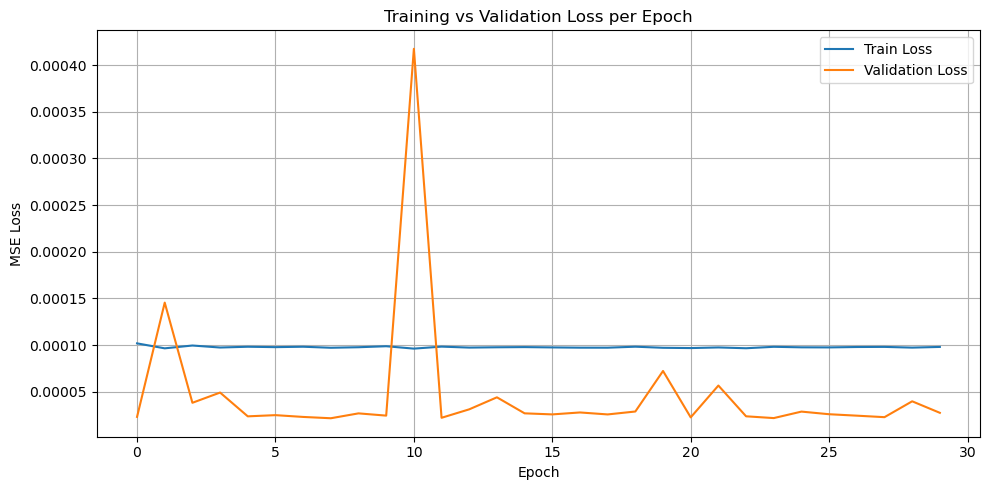

Runtime: 4781.45 seconds
Mean Val Loss: 0.000047
Std Val Loss: 0.000073
Min Val Loss: 0.000022
Max Val Loss: 0.000417


In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import time

# Model architecture
model = Sequential([
    Input(shape=(lookback, len(features))),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(horizon)  # Predict next 3 hours of river level
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

# Train and track time
start_time = time.time()
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=4,
    verbose=1
)
end_time = time.time()
runtime = end_time - start_time

# Plot training vs validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training vs Validation Loss per Epoch')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print summary stats
losses = history.history['val_loss']
print(f"Runtime: {runtime:.2f} seconds")
print(f"Mean Val Loss: {np.mean(losses):.6f}")
print(f"Std Val Loss: {np.std(losses):.6f}")
print(f"Min Val Loss: {np.min(losses):.6f}")
print(f"Max Val Loss: {np.max(losses):.6f}")

**Step 2: Batch Size Tuning & Selection**

In [27]:
import numpy as np
import pandas as pd
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

num_runs = 30 
batch_sizes = [4, 8, 16, 32, 64]
num_epochs = 2  # my best epoch

results = []

learning_rate = 0.01

for batch_size in batch_sizes:
    print(f"\n🔍 Batch size: {batch_size}")
    val_loss_list = []
    runtime_list = []

    for run in range(num_runs):
        print(f"  ▶️ Run {run + 1}/{num_runs}...", end=' ')
        # Build a new model each run
        model = Sequential([
            Input(shape=(X_train.shape[1], X_train.shape[2])),
            LSTM(64, return_sequences=True),
            Dropout(0.2),
            LSTM(64),
            Dropout(0.2),
            Dense(y_train.shape[1])
        ])
        model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')

        start_time = time.time()
        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=num_epochs,
            batch_size=batch_size,
            verbose=0  # Silent training
        )
        end_time = time.time()

        val_loss = history.history['val_loss'][-1]  # Get last val_loss
        val_loss_list.append(val_loss)
        runtime_list.append(end_time - start_time)
        print(f"✅ val_loss={val_loss:.6f}, time={end_time - start_time:.2f}s")

    # Store aggregate stats for this batch size
    results.append({
        'Batch Size': batch_size,
        'Mean Val Loss': np.mean(val_loss_list),
        'Std Dev': np.std(val_loss_list),
        'Min Val Loss': np.min(val_loss_list),
        'Max Val Loss': np.max(val_loss_list),
        'Avg Runtime (sec)': np.mean(runtime_list)
    })

# Format into DataFrame
df_results = pd.DataFrame(results)
print("\n📊 Final Summary of 30 Runs per Batch Size:")
print(df_results)


🔍 Batch size: 4
  ▶️ Run 1/30... ✅ val_loss=0.000026, time=125.11s
  ▶️ Run 2/30... ✅ val_loss=0.000005, time=137.62s
  ▶️ Run 3/30... ✅ val_loss=0.000004, time=141.69s
  ▶️ Run 4/30... ✅ val_loss=0.000026, time=144.87s
  ▶️ Run 5/30... ✅ val_loss=0.000003, time=138.00s
  ▶️ Run 6/30... ✅ val_loss=0.000005, time=138.16s
  ▶️ Run 7/30... ✅ val_loss=0.000006, time=139.94s
  ▶️ Run 8/30... ✅ val_loss=0.000067, time=139.46s
  ▶️ Run 9/30... ✅ val_loss=0.000003, time=134.42s
  ▶️ Run 10/30... ✅ val_loss=0.000352, time=135.17s
  ▶️ Run 11/30... ✅ val_loss=0.000025, time=136.32s
  ▶️ Run 12/30... ✅ val_loss=0.000057, time=132.91s
  ▶️ Run 13/30... ✅ val_loss=0.000007, time=140.44s
  ▶️ Run 14/30... ✅ val_loss=0.000061, time=138.21s
  ▶️ Run 15/30... ✅ val_loss=0.000041, time=140.73s
  ▶️ Run 16/30... ✅ val_loss=0.000007, time=144.08s
  ▶️ Run 17/30... ✅ val_loss=0.000035, time=143.02s
  ▶️ Run 18/30... ✅ val_loss=0.000024, time=139.42s
  ▶️ Run 19/30... ✅ val_loss=0.000029, time=142.17s
  ▶️

**Step 3: Neuron Tuning & Its Selction**

In [28]:
import time
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Input
from tensorflow.keras.optimizers import Adam

# Define neuron configurations to test
neuron_configs = [16, 32, 64, 128]
num_epochs = 2 # Best epoch from Step 1
best_batch_size = 64 # Best batch size from Step 2

results_neurons = []

for neurons in neuron_configs:
    print(f"🔍 Neuron count: {neurons}")
    val_losses = []
    runtimes = []
    for run in range(30):
        print(f"  ▶️ Run {run + 1}/30...", end=' ')
        try:
            # Build model
            model = Sequential([
                Input(shape=(X_train.shape[1], X_train.shape[2])),
                LSTM(neurons, return_sequences=True),
                Dropout(0.2),
                LSTM(neurons),
                Dropout(0.2),
                Dense(y_train.shape[1])
            ])
            model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

            # Train model
            start_time = time.time()
            history = model.fit(
                X_train, y_train,
                validation_data=(X_val, y_val),
                epochs=num_epochs,
                batch_size=best_batch_size,
                verbose=0
            )
            end_time = time.time()

            val_loss = history.history['val_loss'][-1]
            runtime = end_time - start_time
            val_losses.append(val_loss)
            runtimes.append(runtime)
            print(f"✅ val_loss={val_loss:.6f}, time={runtime:.2f}s")
        except Exception as e:
            print(f"❌ Error: {str(e)}")
            val_losses.append(np.nan)
            runtimes.append(np.nan)

    results_neurons.append({
        'neurons': neurons,
        'mean_loss': np.nanmean(val_losses),
        'std_loss': np.nanstd(val_losses),
        'min_loss': np.nanmin(val_losses),
        'max_loss': np.nanmax(val_losses),
        'avg_runtime_sec': np.nanmean(runtimes)
    })

# Convert results to DataFrame
df_neuron_results = pd.DataFrame(results_neurons)
df_neuron_results.columns = [
    'Neurons', 'Mean Val Loss', 'Std Dev', 'Min Val Loss', 'Max Val Loss', 'Avg Runtime (sec)'
]

print("\n📊 Final Summary:")
print(df_neuron_results)

🔍 Neuron count: 16
  ▶️ Run 1/30... ✅ val_loss=0.000004, time=11.57s
  ▶️ Run 2/30... ✅ val_loss=0.000007, time=12.01s
  ▶️ Run 3/30... ✅ val_loss=0.000004, time=14.53s
  ▶️ Run 4/30... ✅ val_loss=0.000005, time=14.06s
  ▶️ Run 5/30... ✅ val_loss=0.000012, time=14.12s
  ▶️ Run 6/30... ✅ val_loss=0.000004, time=14.04s
  ▶️ Run 7/30... ✅ val_loss=0.000010, time=14.47s
  ▶️ Run 8/30... ✅ val_loss=0.000150, time=14.92s
  ▶️ Run 9/30... ✅ val_loss=0.000004, time=15.22s
  ▶️ Run 10/30... ✅ val_loss=0.000006, time=14.80s
  ▶️ Run 11/30... ✅ val_loss=0.000005, time=14.92s
  ▶️ Run 12/30... ✅ val_loss=0.000004, time=14.75s
  ▶️ Run 13/30... ✅ val_loss=0.000005, time=14.55s
  ▶️ Run 14/30... ✅ val_loss=0.000022, time=14.84s
  ▶️ Run 15/30... ✅ val_loss=0.000004, time=14.68s
  ▶️ Run 16/30... ✅ val_loss=0.000007, time=17.12s
  ▶️ Run 17/30... ✅ val_loss=0.000006, time=15.04s
  ▶️ Run 18/30... ✅ val_loss=0.000004, time=14.44s
  ▶️ Run 19/30... ✅ val_loss=0.000007, time=15.04s
  ▶️ Run 20/30... ✅ v

## 6. Model Comparison

**6.1 MLP**

**Step 1: Defining Best MLP Model**

In [67]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report, confusion_matrix
import numpy as np

# Define best configuration
best_hidden_layers = (12, 13)  # Replace with your best split
best_learning_rate = 0.01
max_iter = 1000

# Combine full dataset (train + test)
X_all = np.concatenate((x_train_mlp, x_test_mlp))
y_all = np.concatenate((y_train_mlp, y_test_mlp))

# Fit best MLP model
print("Fitting best MLP model on full data...")
best_mlp_model = MLPRegressor(
    hidden_layer_sizes=best_hidden_layers,
    learning_rate_init=best_learning_rate,
    max_iter=max_iter,
    early_stopping=True,
    random_state=42
)
best_mlp_model.fit(X_all, y_all)

# Predict
y_pred_all = best_mlp_model.predict(X_all)

# === Regression Metrics ===
mae = mean_absolute_error(y_all, y_pred_all)
rmse = np.sqrt(mean_squared_error(y_all, y_pred_all))  # fixed
r2 = r2_score(y_all, y_pred_all)

print(f"\n=== Final MLP Metrics on Full Data ===")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

# === Classification Evaluation ===
flood_threshold = 2.5
y_pred_class = (y_pred_all > flood_threshold).astype(int)
y_true_class = (y_all > flood_threshold).astype(int)

print("\n=== Classification Report (Flood Detection) ===")
print(confusion_matrix(y_true_class.flatten(), y_pred_class.flatten()))
print(classification_report(y_true_class.flatten(), y_pred_class.flatten()))

Fitting best MLP model on full data...

=== Final MLP Metrics on Full Data ===
MAE: 0.0173
RMSE: 0.1127
R²: 0.5245

=== Classification Report (Flood Detection) ===
[[131309      1]
 [    10      2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    131310
           1       0.67      0.17      0.27        12

    accuracy                           1.00    131322
   macro avg       0.83      0.58      0.63    131322
weighted avg       1.00      1.00      1.00    131322



**Step 2: Water Level Prediction Metrics (Regression)**

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Flatten predictions and true values for the multi-step horizon
y_pred_flat = best_pred_mlp.flatten()
y_true_flat = y_test_mlp.flatten()

# Compute metrics
mae_mlp = mean_absolute_error(y_true_flat, y_pred_flat)
rmse_mlp = np.sqrt(mean_squared_error(y_true_flat, y_pred_flat))
r2_mlp = r2_score(y_true_flat, y_pred_flat)

print("MLP MAE:", mae_mlp)
print("MLP RMSE:", rmse_mlp)
print("MLP R²:", r2_mlp)

MLP MAE: 0.015674187412468954
MLP RMSE: 0.12951019742471367
MLP R²: 0.4401242214765215


**Step 3: Flood Classification Metrics (Classification)**

In [72]:
from sklearn.metrics import recall_score, f1_score
import numpy as np

# Step 1: Get MLP predictions from test set
# Replace with your variables if different
y_pred_mlp = best_pred_mlp  # shape: (n_samples, 3)
y_true_mlp = y_test_mlp     # shape: (n_samples, 3)

# Step 2: Define flood threshold using 99th percentile of true river levels
flood_threshold = np.percentile(y_true_mlp, 99)
print("Flood threshold (99th percentile):", round(flood_threshold, 3))

# Step 3: Convert to binary flood labels (1 if river level ≥ threshold)
y_pred_flood = (y_pred_mlp >= flood_threshold).astype(int)
y_true_flood = (y_true_mlp >= flood_threshold).astype(int)

# Step 4: Flatten for multi-step classification comparison
y_pred_flood_flat = y_pred_flood.flatten()
y_true_flood_flat = y_true_flood.flatten()

# Step 5: Compute classification metrics
recall_mlp = recall_score(y_true_flood_flat, y_pred_flood_flat)
f1_mlp = f1_score(y_true_flood_flat, y_pred_flood_flat)

# Output results
print("MLP Recall:", round(recall_mlp, 4))
print("MLP F1-Score:", round(f1_mlp, 4))

Flood threshold (99th percentile): 0.677
MLP Recall: 0.6447
MLP F1-Score: 0.6846


**6.2 LSTM**

**Step 1: Defining Best LSTM Model**

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Input
from tensorflow.keras.optimizers import Adam

# Best model Set-up
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(32, return_sequences=True), # my best neuron count is 32
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(y_train.shape[1])
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Refit on training + validation data (optional for final performance)
X_train_val = np.concatenate((X_train, X_val))
y_train_val = np.concatenate((y_train, y_val))

# My best: epoch = 2, batch size = 64 
model.fit(X_train_val, y_train_val, epochs=2, batch_size=64, verbose=1) 

Epoch 1/2
548/548 ━━━━━━━━━━━━━━━━━━━━ 35s 50ms/step - loss: 3.7140e-04
Epoch 2/2
548/548 ━━━━━━━━━━━━━━━━━━━━ 25s 46ms/step - loss: 6.0080e-05


**Step 2: Water Level Prediction Metrics (Regression)**

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions using your trained best LSTM model
y_pred_scaled = model.predict(X_test)
y_pred = target_scaler.inverse_transform(y_pred_scaled)
y_true = target_scaler.inverse_transform(y_test)

# For horizon > 1, compute on all values flattened
y_pred_flat = y_pred.flatten()
y_true_flat = y_true.flatten()

# Compute metrics
mae_lstm = mean_absolute_error(y_true_flat, y_pred_flat)
rmse_lstm = np.sqrt(mean_squared_error(y_true_flat, y_pred_flat))
r2_lstm = r2_score(y_true_flat, y_pred_flat)

print("LSTM MAE:", mae_lstm)
print("LSTM RMSE:", rmse_lstm)
print("LSTM R²:", r2_lstm)

274/274 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step
LSTM MAE: 0.0375332338931259
LSTM RMSE: 0.054666014058525836
LSTM R²: 0.7416247665652458


**Step 3: Flood Classification Metrics (Classification)**

In [30]:
from sklearn.metrics import recall_score, f1_score
import numpy as np

# Step 1: Predict on test set
y_pred_scaled = model.predict(X_test)
y_pred = target_scaler.inverse_transform(y_pred_scaled)
y_true = target_scaler.inverse_transform(y_test)

# Step 2: Define flood threshold using 99th percentile of actual river levels
flood_threshold = np.percentile(y_true, 99)
print("Flood threshold (99th percentile):", round(flood_threshold, 3))

# Step 3: Convert to binary flood labels
y_pred_flood = (y_pred >= flood_threshold).astype(int)
y_true_flood = (y_true >= flood_threshold).astype(int)

# Step 4: Flatten predictions and ground truths for classification comparison
y_pred_flood_flat = y_pred_flood.flatten()
y_true_flood_flat = y_true_flood.flatten()

# Step 5: Compute recall and F1-score
recall_lstm = recall_score(y_true_flood_flat, y_pred_flood_flat)
f1_lstm = f1_score(y_true_flood_flat, y_pred_flood_flat)

# Output results
print("LSTM Recall:", round(recall_lstm, 4))
print("LSTM F1-Score:", round(f1_lstm, 4))

274/274 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step
Flood threshold (99th percentile): 0.642
LSTM Recall: 0.5606
LSTM F1-Score: 0.5968


**Step 4: Plotting the MAE, RMSE, R2, the recall and F1-Score**

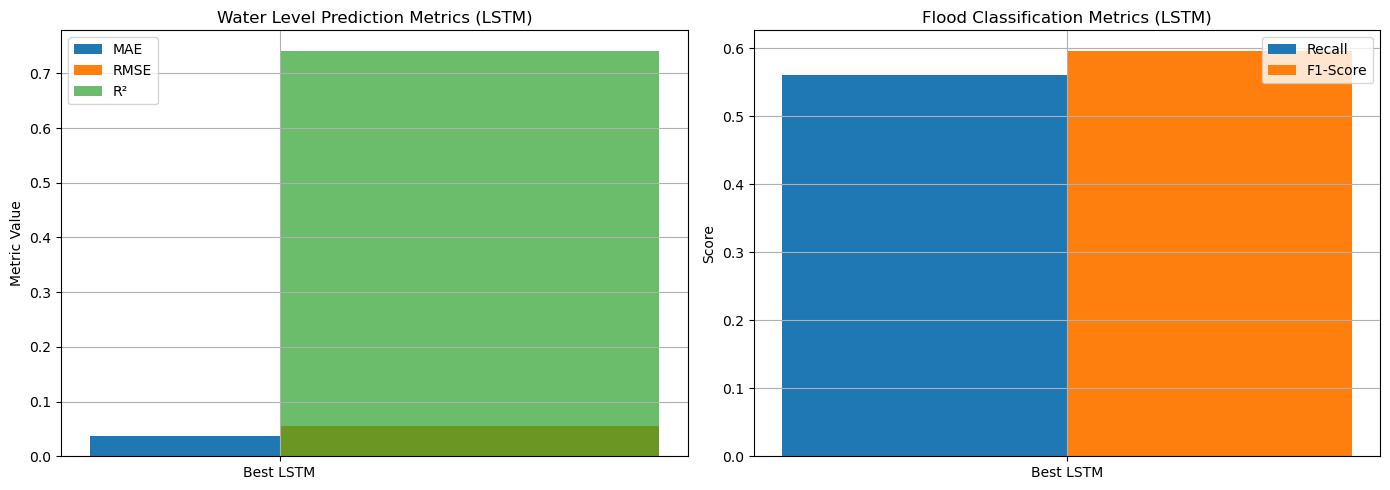

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for Best LSTM model (replace with actual calculated values)
mae = [0.0375332338931259]
rmse = [0.054666014058525836]
r2 = [0.7416247665652458]

recall = [0.5606]
f1_score = [0.5968]

# Labels
models = ['Best LSTM']

# Plot setup
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Water level prediction metrics
axes[0].bar(models, mae, width=0.2, label='MAE', align='center')
axes[0].bar(models, rmse, width=0.2, label='RMSE', align='edge')
axes[0].bar(models, r2, width=0.2, label='R²', align='edge', alpha=0.7)
axes[0].set_title('Water Level Prediction Metrics (LSTM)')
axes[0].set_ylabel('Metric Value')
axes[0].legend()
axes[0].grid(True)

# Flood classification metrics
x = np.arange(len(models))
width = 0.35
axes[1].bar(x - width/2, recall, width, label='Recall')
axes[1].bar(x + width/2, f1_score, width, label='F1-Score')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models)
axes[1].set_title('Flood Classification Metrics (LSTM)')
axes[1].set_ylabel('Score')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

**Step 4: MLP vs LSTM - Plotting the MAE, RMSE, R2, the recall and F1-Score**

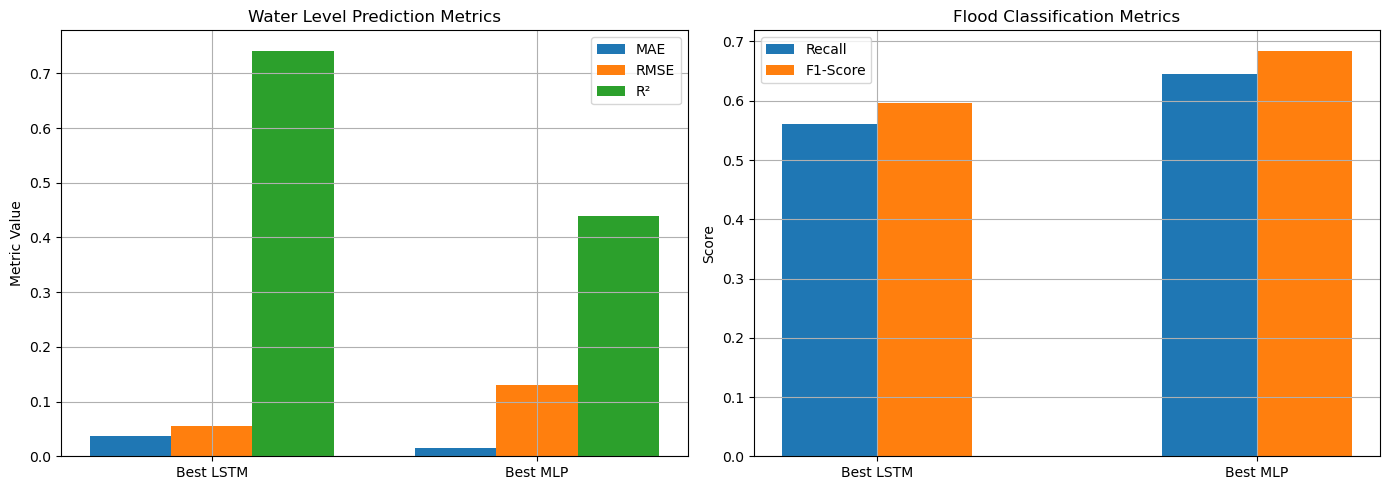

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# === Final computed metrics ===
# LSTM metrics (unchanged)
mae_lstm = 0.0375
rmse_lstm = 0.0547
r2_lstm = 0.7416
recall_lstm = 0.5606
f1_lstm = 0.5968

# MLP metrics (from your last test set results)
mae_mlp = 0.0157
rmse_mlp = 0.1295
r2_mlp = 0.4401
recall_mlp = 0.6447
f1_mlp = 0.6846

# Models
models = ['Best LSTM', 'Best MLP']

# Regression metrics
mae = [mae_lstm, mae_mlp]
rmse = [rmse_lstm, rmse_mlp]
r2 = [r2_lstm, r2_mlp]

# Classification metrics
recall = [recall_lstm, recall_mlp]
f1_scores = [f1_lstm, f1_mlp]

# === Plotting ===
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Water level prediction metrics
bar_width = 0.25
x = np.arange(len(models))

axes[0].bar(x - bar_width, mae, width=bar_width, label='MAE')
axes[0].bar(x, rmse, width=bar_width, label='RMSE')
axes[0].bar(x + bar_width, r2, width=bar_width, label='R²')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].set_title('Water Level Prediction Metrics')
axes[0].set_ylabel('Metric Value')
axes[0].legend()
axes[0].grid(True)

# Flood classification metrics
axes[1].bar(x - bar_width/2, recall, width=bar_width, label='Recall')
axes[1].bar(x + bar_width/2, f1_scores, width=bar_width, label='F1-Score')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models)
axes[1].set_title('Flood Classification Metrics')
axes[1].set_ylabel('Score')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

## 7. Ex-Tropical Cyclone Case Study

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Input
from tensorflow.keras.optimizers import Adam

# Best model Set-up
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(32, return_sequences=True), # my best neuron count is 32
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(y_train.shape[1])
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Refit on training + validation data (optional for final performance)
X_train_val = np.concatenate((X_train, X_val))
y_train_val = np.concatenate((y_train, y_val))

# My best: epoch = 2, batch size = 64 
model.fit(X_train_val, y_train_val, epochs=2, batch_size=64, verbose=1) 

Epoch 1/2
548/548 ━━━━━━━━━━━━━━━━━━━━ 32s 47ms/step - loss: 2.3749e-04
Epoch 2/2
548/548 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - loss: 4.8674e-05


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


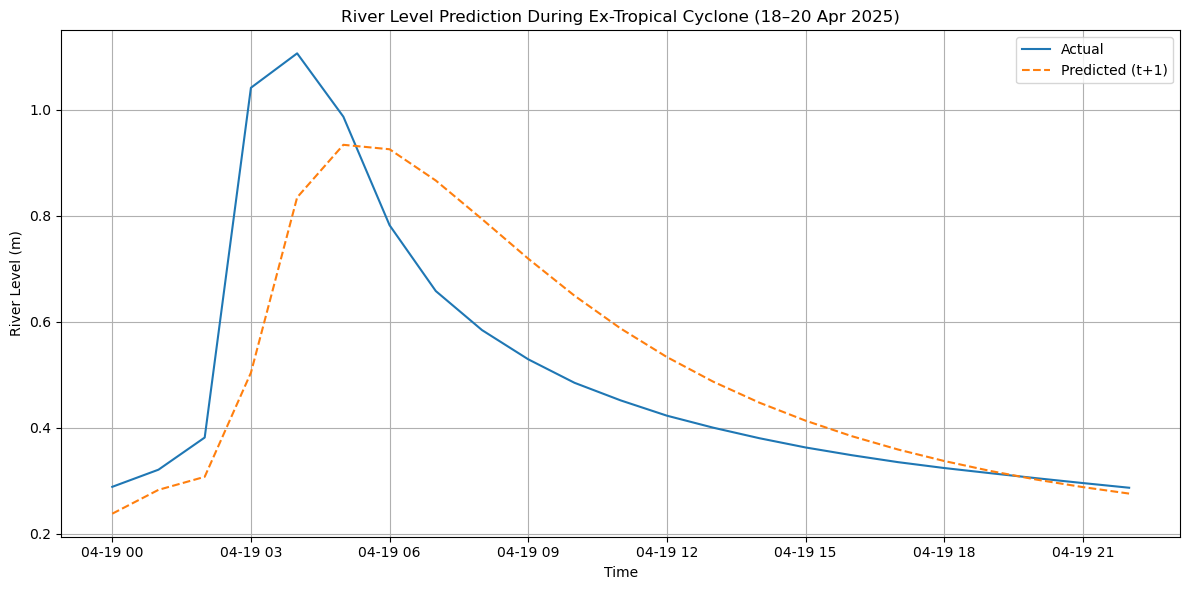

In [35]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Step 1. Filter cyclone period
storm_df = df_clean[(df_clean['start_time'] >= '2025-04-18') & (df_clean['start_time'] <= '2025-04-20')].copy()

# Step 2: Select features and target
features = ['river_discharge_m3s', 'rainfall_manukau_mm', 'rainfall_puhinui_mm',
            'humidity_pct']
target = 'river_level_m'  # Predicting river level (regression)

# Step 3: Normalize features and target separately
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

feature_scaler.fit(df_clean[features])
target_scaler.fit(df_clean[[target]])

# Normalize cyclone period using training scalers
X_cyc_scaled = feature_scaler.transform(storm_df[features])
y_cyc_scaled = target_scaler.transform(storm_df[[target]])

# Step 4: Create sequences with lookback of 24 hours and predict next 3 hours
lookback = 24
horizon = 3

# Step 5: Create input-output sequences from cyclone period
X_cyc_seq, y_cyc_seq = [], []
for i in range(lookback, len(storm_df) - horizon + 1):
    X_cyc_seq.append(X_cyc_scaled[i - lookback:i])
    y_cyc_seq.append(y_cyc_scaled[i:i + horizon].flatten())

X_cyc_seq = np.array(X_cyc_seq)
y_cyc_seq = np.array(y_cyc_seq)

# Step 6: Predict river level using trained best LSTM model
y_pred_scaled = model.predict(X_cyc_seq)
y_pred = target_scaler.inverse_transform(y_pred_scaled)

# Step 7: Get aligned timestamps for plotting & Plotting
storm_time = storm_df['start_time'].iloc[lookback : len(y_pred) + lookback]

plt.figure(figsize=(12,6))
plt.plot(storm_time, storm_df['river_level_m'].iloc[lookback : len(y_pred) + lookback], label="Actual")
plt.plot(storm_time, y_pred[:, 0], label="Predicted (t+1)", linestyle='--')
plt.title("River Level Prediction During Ex-Tropical Cyclone (18–20 Apr 2025)")
plt.xlabel("Time")
plt.ylabel("River Level (m)")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()